# Naive Object Proposal Methods

In this notebook, we will explore some naive object proposal methods that we can potentially use in conjunction with an existing state-of-the-art proposal network.

The reason we want to explore a naive method is to see if we can have two separate pipelines "vote" regions of interest, where the first pipeline (Fast RCNN and VGGnet) is general purpose and the second is domain specific.

In [101]:
# Setup our notebook environment
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import HTML


def show_cv2_image(image, plot_title='', convert=None):
    plt.figure()
    plt.axis("off")
    plt.title(plot_title)
    
    if convert:
        plt.imshow(cv2.cvtColor(image, convert))
    else:
        plt.imshow(image, cmap=plt.cm.binary)

In [159]:
def resize(image, ratio=0.5):
    return cv2.resize(image, (0,0), fx=ratio, fy=ratio)

def do_transforms(path, ratio=0.5):

    image = resize(cv2.imread(path), ratio=ratio)

    gray = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize = 3)
    minLineLength = 100
    maxLineGap = 5

    hough = image.copy()
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            hough = cv2.line(hough, (x1, y1), (x2, y2), (0, 255, 0), 2)


    fft = resize(cv2.imread(path, 0), ratio=ratio)
    f = np.fft.fft2(fft)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    show_cv2_image(image, 'Source Image - {}'.format(path), convert=cv2.COLOR_BGR2RGB)
    show_cv2_image(gray, 'Grayscale - {}'.format(path))
    show_cv2_image(edges, 'Edges - {}'.format(path))
    show_cv2_image(hough, 'Hough Line Transform - {}'.format(path), convert=cv2.COLOR_BGR2RGB)
    show_cv2_image(magnitude_spectrum, 'Fourier Transform - {}'.format(path))

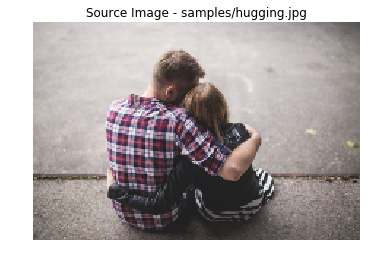

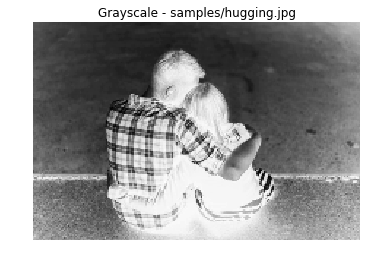

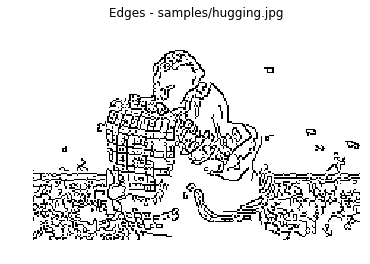

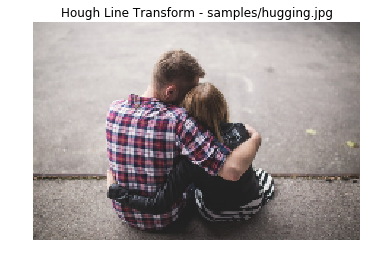

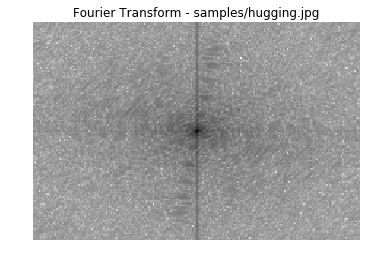

In [156]:
do_transforms('samples/hugging.jpg', ratio=0.35)

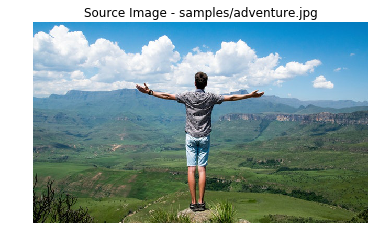

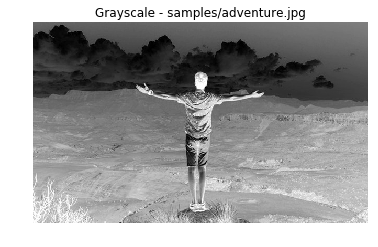

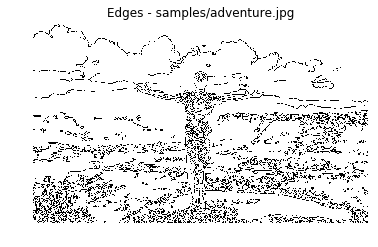

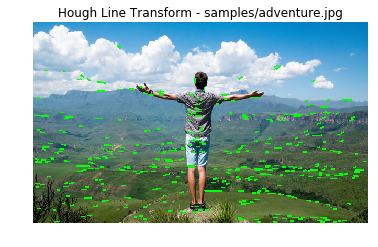

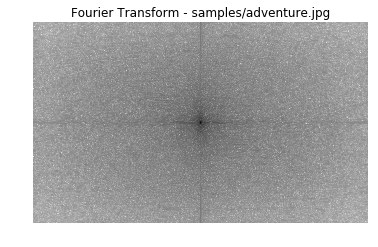

In [160]:
do_transforms('samples/adventure.jpg', ratio=1.0)

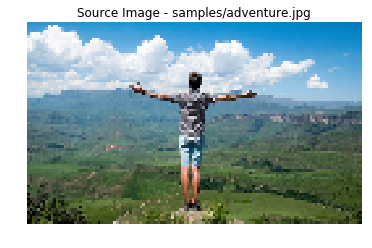

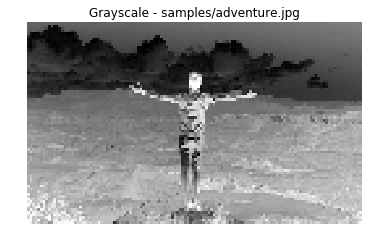

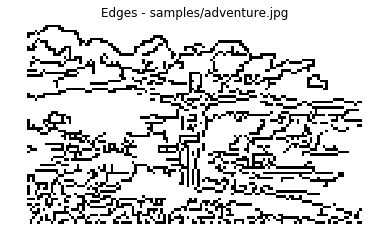

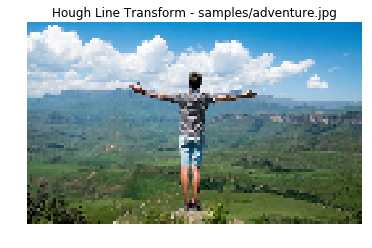

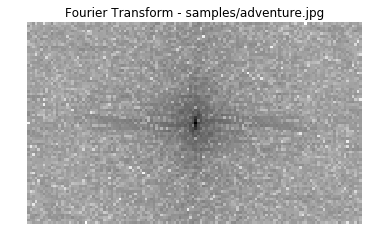

In [157]:
do_transforms('samples/adventure.jpg', ratio=0.2)